In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Emplacement
folder = "/Users/gregoiregobert/Downloads/42/knight"
folder = "/home/ggobert/Downloads"

df = pd.read_csv(folder + "/Train_knight.csv")
df = df.drop(columns='knight')


In [2]:
scaler = MinMaxScaler()
nor_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [3]:
variances = nor_df.var()

variance_total = variances.sum()
variances_percentage = (variances / variance_total) * 100

variances_sorted = variances_percentage.sort_values(ascending=False)
print(variances)


Sensitivity      0.026238
Hability         0.019745
Strength         0.026511
Power            0.020678
Agility          0.033767
Dexterity        0.031393
Awareness        0.034349
Prescience       0.042701
Reactivity       0.017950
Midi-chlorien    0.023798
Slash            0.010788
Push             0.014806
Pull             0.009781
Lightsaber       0.007921
Survival         0.009864
Repulse          0.025932
Friendship       0.006470
Blocking         0.013796
Deflection       0.018962
Mass             0.007779
Recovery         0.027404
Evade            0.033214
Stims            0.026068
Sprint           0.017446
Combo            0.022847
Delay            0.024179
Attunement       0.029616
Empowered        0.050513
Burst            0.030333
Grasping         0.014673
dtype: float64


In [4]:
# Calculer la variance cumulative en pourcentage
variance_cumsum = variances_sorted.cumsum() / variances_sorted.sum()

# Trouver le nombre de compétences nécessaires pour atteindre 90 % de la variance
num_components_needed = (variance_cumsum <= 0.90).sum()

print(f"Nombre de compétences nécessaires pour atteindre 90% de la variance: {num_components_needed}")


Nombre de compétences nécessaires pour atteindre 90% de la variance: 22


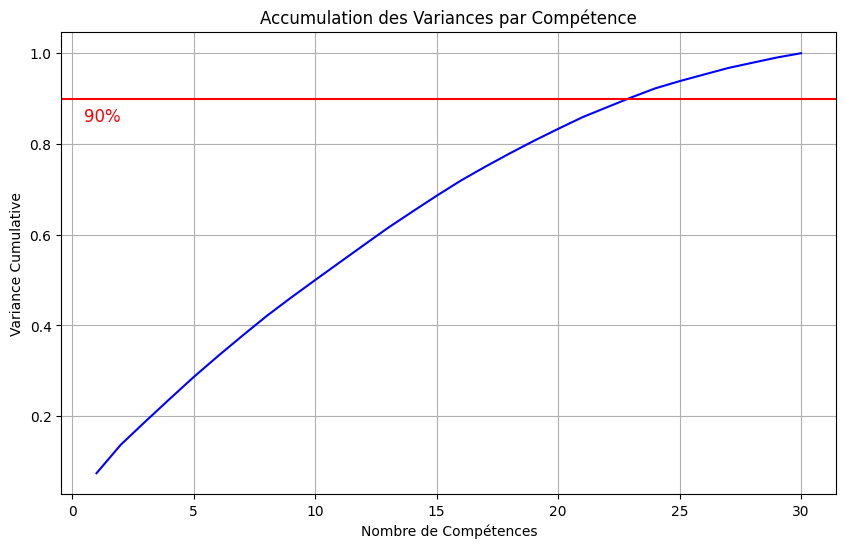

In [5]:
# Créer un graphique de la variance cumulative
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_cumsum) + 1), variance_cumsum, color='b')
plt.title('Accumulation des Variances par Compétence')
plt.xlabel('Nombre de Compétences')
plt.ylabel('Variance Cumulative')
plt.axhline(y=0.90, color='r')
plt.text(0.5, 0.85, '90%', color='red', fontsize=12)
plt.grid(True)
plt.show()
